 # **Proyecto 4: Clasificación de señales ECG**

### Andres Banquez - Melina Villada

### *Objetivos:*

Extraer características de señales que permitan construir sistemas de clasificación automática

1. Revisión teórica. Del artículo:
https://www.nature.com/articles/s41598-020-59821-7

Hacer un resumen de la sección extracción de caracteríticas (Features extraction) y discutir desde el artículo u otras referencias como se hace cuando desaparecen ciertas formas de ondas en el complejo PQRS debido a alguna enfermedad (10%)

En estudios previos, se han utilizado con éxito modelos de redes neuronales para la clasificación de arritmias. Estos modelos emplearon transformaciones secuenciales de los datos en bruto como características que finalmente se introducían en un clasificador de regresión logística multinomial (unidad softmax). La arquitectura de las redes neuronales permite una cantidad infinita de tales modelos, y entrenar correctamente incluso uno de ellos requiere grandes cantidades de datos y tiempo de computación.

Otra estrategia común es extraer características como magnitudes de picos, duración, distancias entre picos y su variabilidad en los cuatro componentes principales de los latidos: onda P, onda Q, onda T y el complejo QRS. Sin embargo, estas características no proporcionan información suficiente para una clasificación de alta precisión de varios tipos de arritmias, especialmente las caracterizadas por distorsión o ausencia completa de algunos componentes. Por ejemplo, en las ondas P de la fibrilación auricular (AFIB) y el aleteo auricular (AFL), comúnmente son reemplazadas por múltiples ondas de aleteo y fibrilación que son más bajas en amplitud y no corresponden al ritmo QRS. Además, el uso de Transformación Wavelet o Transformación Rápida de Fourier para extraer características de frecuencia descuida la información del dominio del tiempo.

En el artículo, se diseñó un método novedoso e interpretable de extracción de características. Como parte de la comparación de esquemas de clasificación en múltiples etapas, se realizó un análisis de enfoques de selección de características que incluyó un total de 11 escenarios distintos. El primer y más simple conjunto de características solo incluía 11 características básicas de la señal, mientras que el último y más exhaustivo conjunto incluía 39,830 características. Agregaron la edad y el género como características debido a su importancia en casi todos los análisis de datos médicos. También se incluyeron otras características significativas como la media y la varianza de los intervalos RR, así como los conteos de intervalos RR que solo se calculan en el ECG de la derivación II.

El Grupo de Características 1 incluye: frecuencia ventricular en latidos por minuto (BPM), frecuencia auricular en BPM, duración del QRS en milisegundos, intervalo QT en milisegundos, eje R, eje T, conteo de QRS, inicio de Q, final de Q, en total 11 variables. El Grupo de Características 2 incluye: media y varianza de los intervalos RR, conteo de intervalos RR, media y varianza de la altura, anchura y prominencia del complejo QRS, picos no QRS y valles en el ECG de la derivación II, en total 23 variables.

Los picos y valles se asignaron a 3 subconjuntos: complejo QRS, picos no QRS y valles. Así, se midieron las relaciones entre picos y valles en 6 combinaciones de pares distintas. Para las 6 combinaciones de pares mencionadas, se calcula la relación entre la diferencia de anchura y la diferencia de tiempo, la relación entre la diferencia de altura y la diferencia de tiempo, y la relación entre la diferencia de prominencia y la diferencia de tiempo. 

El Grupo de Características 6 está diseñado para el ECG de la derivación II y consta de un total de 900 frecuencias de altura, anchura y prominencia para el complejo QRS, picos no QRS y valles; un total de 600 frecuencias de diferencia de ubicación; y un total de 1800 frecuencias de la relación entre diferencia de anchura y diferencia de tiempo, la relación entre diferencia de altura y diferencia de tiempo, y la relación entre diferencia de prominencia y diferencia de tiempo.

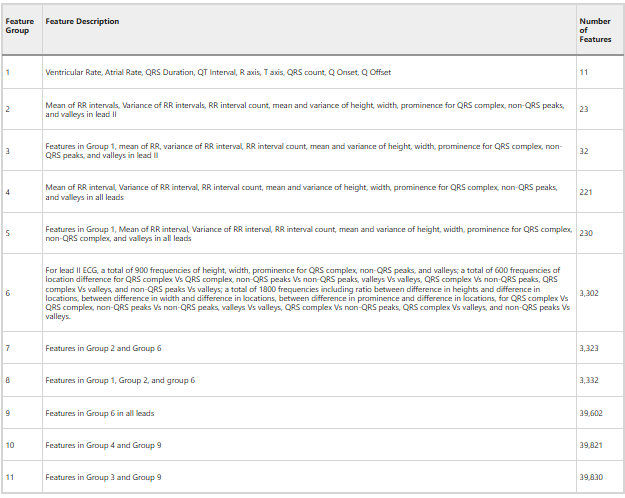

**Tabla 1.** Feature groups table.

Cuando ciertas formas de ondas en el complejo PQRS desaparecen debido a una enfermedad, se enfrenta un desafío significativo en la clasificación de arritmias. Las ondas del ECG, como la onda P, el complejo QRS y la onda T, son fundamentales para interpretar la actividad eléctrica del corazón y diagnosticar diversas condiciones cardíacas. La desaparición o distorsión de estas ondas puede complicar este proceso. A continuación, se discuten algunos enfoques y estrategias utilizados para manejar esta situación, tanto desde el artículo mencionado como de otras referencias relevantes:

Estrategias de Manejo y Clasificación
Extracción de Características Alternativas:

* Análisis de Intervalos RR: Cuando las ondas específicas desaparecen, se puede recurrir al análisis de intervalos RR (el tiempo entre dos complejos QRS sucesivos) y sus variaciones. Esto puede proporcionar información sobre la regularidad y el ritmo cardíaco, crucial para identificar arritmias como la fibrilación auricular (AFIB), donde las ondas P suelen estar ausentes o son reemplazadas por ondas de fibrilación.[1]

* Duración y Morfología del Complejo QRS: En caso de desaparición de la onda P o T, el complejo QRS puede ser analizado en términos de su duración y morfología. La duración prolongada del QRS puede indicar bloqueos de rama u otros trastornos de conducción. [2]

* Transformada de Fourier y Wavelet: Estas técnicas pueden ser utilizadas para analizar la frecuencia de las señales del ECG. Aunque estas transformaciones pueden perder información del dominio del tiempo, pueden ayudar a detectar patrones de frecuencia anormales asociados con ciertas arritmias.

2. Base de datos. Del proyecto pasado hay dos opciones de base de datos, la filtrada por los autores o la filtrada en el proyecto 3. De acuerdo a los resultados del proyecto 3 usar la mejor base de datos y justificar la selección
De la base de datos extraer los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation). Esta información está en el archivo Diagnostics.xlsx De estos registros los análisis para el presente proyecto deben hacerse en la derivación II

3. Herramientas computacionales. Hacer un minitutorial del uso de la herramienta NeuroKit (https://neuropsychology.github.io/NeuroKit/index.html) orientado al análisis de señales ECG (10%)

3.1 Se realiza la instalción de la libreria con:

In [ ]:
pip install neurokit2


3.2 Una vez instalado, importa las librerías necesarias:

In [2]:
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt


3.3.Cargar una señal ECG, puedes utilizar tus propios datos o generar una señal sintética

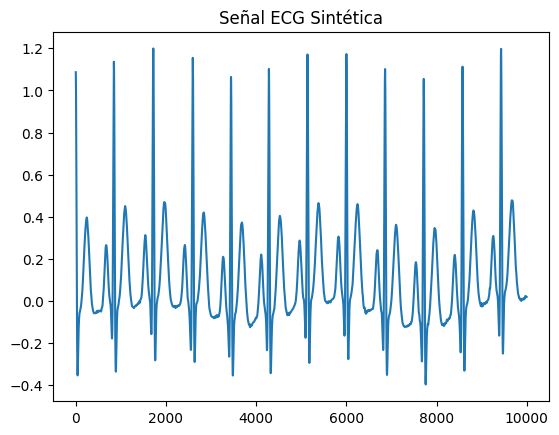

In [3]:
# Cargar señal sintética
ecg_signal = nk.ecg_simulate(duration=10, noise=0.01)

# Visualizar la señal
plt.plot(ecg_signal)
plt.title("Señal ECG Sintética")
plt.show()


3.4 NeuroKit proporciona funciones para procesar la señal ECG y extraer características importantes. El procesamiento básico incluye la detección de los picos R y la extracción de intervalos RR.

c:\Users\melin\AppData\Local\Programs\Python\Python311\Lib\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


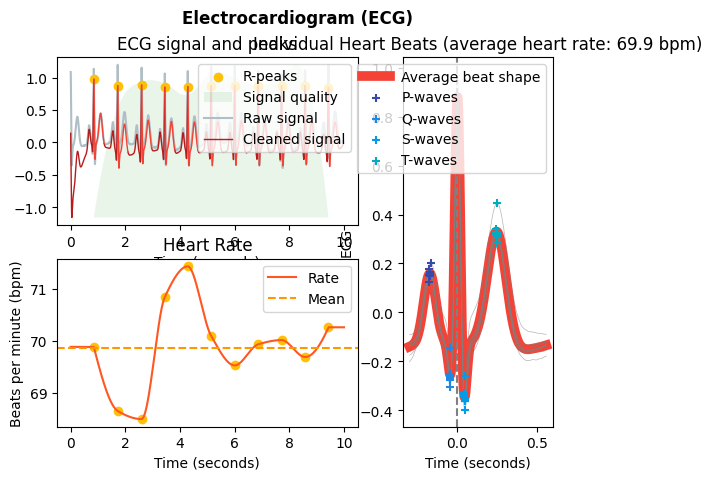

In [9]:
# Procesar la señal ECG
ecg_signals, info = nk.ecg_process(ecg_signal, sampling_rate=1000)

# Visualizar el procesamiento
nk.ecg_plot(ecg_signals)


3.5 Extraer características específicas de la señal ECG, como la variabilidad del ritmo cardíaco y analizarla (HRV).

Error al calcular HRV: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.


## **Bibliografía**

[1] A method for detection of atrial fibrillation using RR intervals. (2000). IEEE Conference Publication | IEEE Xplore. https://ieeexplore.ieee.org/document/898539

[2]  Jarvis S (2021) Electrocardiogram 3: cardiac rhythm and conduction abnormalities. Nursing Times [online]; 117: 8, 27-32. https://cdn.ps.emap.com/wp-content/uploads/sites/3/2021/07 210728-Electrocardiogram-3-cardiac-rhythm-and-conduction-abnormalities1.pdf